# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Importing the dataset

In [2]:
spotify = pd.read_csv("/home/admin1/Downloads/spotify.csv")
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Dataset Info

Here we will get idea of number of columns, datatypes, null values, size of dataset.

In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

# Describing Dataset

Here we will get statistical information for all the numerical data types columns

In [4]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113027.000000,1.130270e+05,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000,113027.000000
mean,33.274386,2.281997e+05,0.568038,0.642947,5.312262,-8.219194,0.637299,0.084294,0.312539,0.154746,0.213274,0.475278,122.267773,3.929035
std,22.322053,1.070011e+05,0.172955,0.250418,3.560905,4.983277,0.480782,0.104315,0.331113,0.308316,0.190024,0.259022,29.961328,0.339922
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.743575e+05,0.457000,0.474000,2.000000,-9.971000,0.000000,0.035900,0.016700,0.000000,0.097900,0.261000,99.559500,4.000000
50%,35.000000,2.130530e+05,0.581000,0.686000,5.000000,-6.981000,1.000000,0.048900,0.166000,0.000041,0.132000,0.465000,122.043000,4.000000
75%,50.000000,2.615620e+05,0.695000,0.854000,8.000000,-4.993500,1.000000,0.084500,0.592000,0.046900,0.273000,0.684000,140.093000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Shape of dataset

It will tell us the number of rows and columns in a dataframe.

In [5]:
spotify.shape

(113027, 20)

# Label Encoding

Here we are converting track_genre and explicit columns to categorical values which will help us in further calculations.

In [6]:
spotify_copy = spotify.copy()

In [7]:
label_encoder = preprocessing.LabelEncoder()
spotify_copy['track_genre']= label_encoder.fit_transform(spotify_copy['track_genre'])
spotify_copy['explicit']= label_encoder.fit_transform(spotify_copy['explicit'])

# Co-relation

We will get what is the relation between two columns on each other.

In [8]:
spo_corr = spotify_copy[['popularity','duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre']]

In [9]:
correlation = spo_corr.corr()
correlation

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
popularity,1.000000,-0.008484,0.044727,0.033524,-0.000706,-0.004463,0.049840,-0.014142,-0.044063,-0.023553,-0.094687,-0.004523,-0.041899,0.012052,0.026017,0.032731
duration_ms,-0.008484,1.000000,-0.065405,-0.075671,0.058345,0.007856,-0.006830,-0.035426,-0.060948,-0.103434,0.127772,0.011921,-0.156583,0.023649,0.009728,-0.033348
explicit,0.044727,-0.065405,1.000000,0.122174,0.096216,0.004555,0.108600,-0.037320,0.305796,-0.094938,-0.102714,0.030596,-0.003996,-0.002596,0.048672,-0.053695
danceability,0.033524,-0.075671,0.122174,1.000000,0.129526,0.035885,0.252429,-0.069973,0.110292,-0.167447,-0.179969,-0.131895,0.474329,-0.054891,0.205237,0.004047
energy,-0.000706,0.058345,0.096216,0.129526,1.000000,0.047539,0.761941,-0.078342,0.143529,-0.732499,-0.179439,0.185153,0.257195,0.246201,0.187459,-0.055984
key,-0.004463,0.007856,0.004555,0.035885,0.047539,1.000000,0.037782,-0.136003,0.020951,-0.040666,-0.005643,-0.001845,0.033709,0.010886,0.011780,-0.005436
loudness,0.049840,-0.006830,0.108600,0.252429,0.761941,0.037782,1.000000,-0.042204,0.063893,-0.587701,-0.430270,0.079445,0.275871,0.211207,0.179968,-0.027356
mode,-0.014142,-0.035426,-0.037320,-0.069973,-0.078342,-0.136003,-0.042204,1.000000,-0.047569,0.095829,-0.050542,0.014440,0.021883,0.000911,-0.026377,0.005432
speechiness,-0.044063,-0.060948,0.305796,0.110292,0.143529,0.020951,0.063893,-0.047569,1.000000,-0.005624,-0.088759,0.199069,0.037262,0.020003,0.029579,-0.082485
acousticness,-0.023553,-0.103434,-0.094938,-0.167447,-0.732499,-0.040666,-0.587701,0.095829,-0.005624,1.000000,0.100898,-0.022134,-0.103729,-0.205867,-0.165363,0.077756


<Axes: >

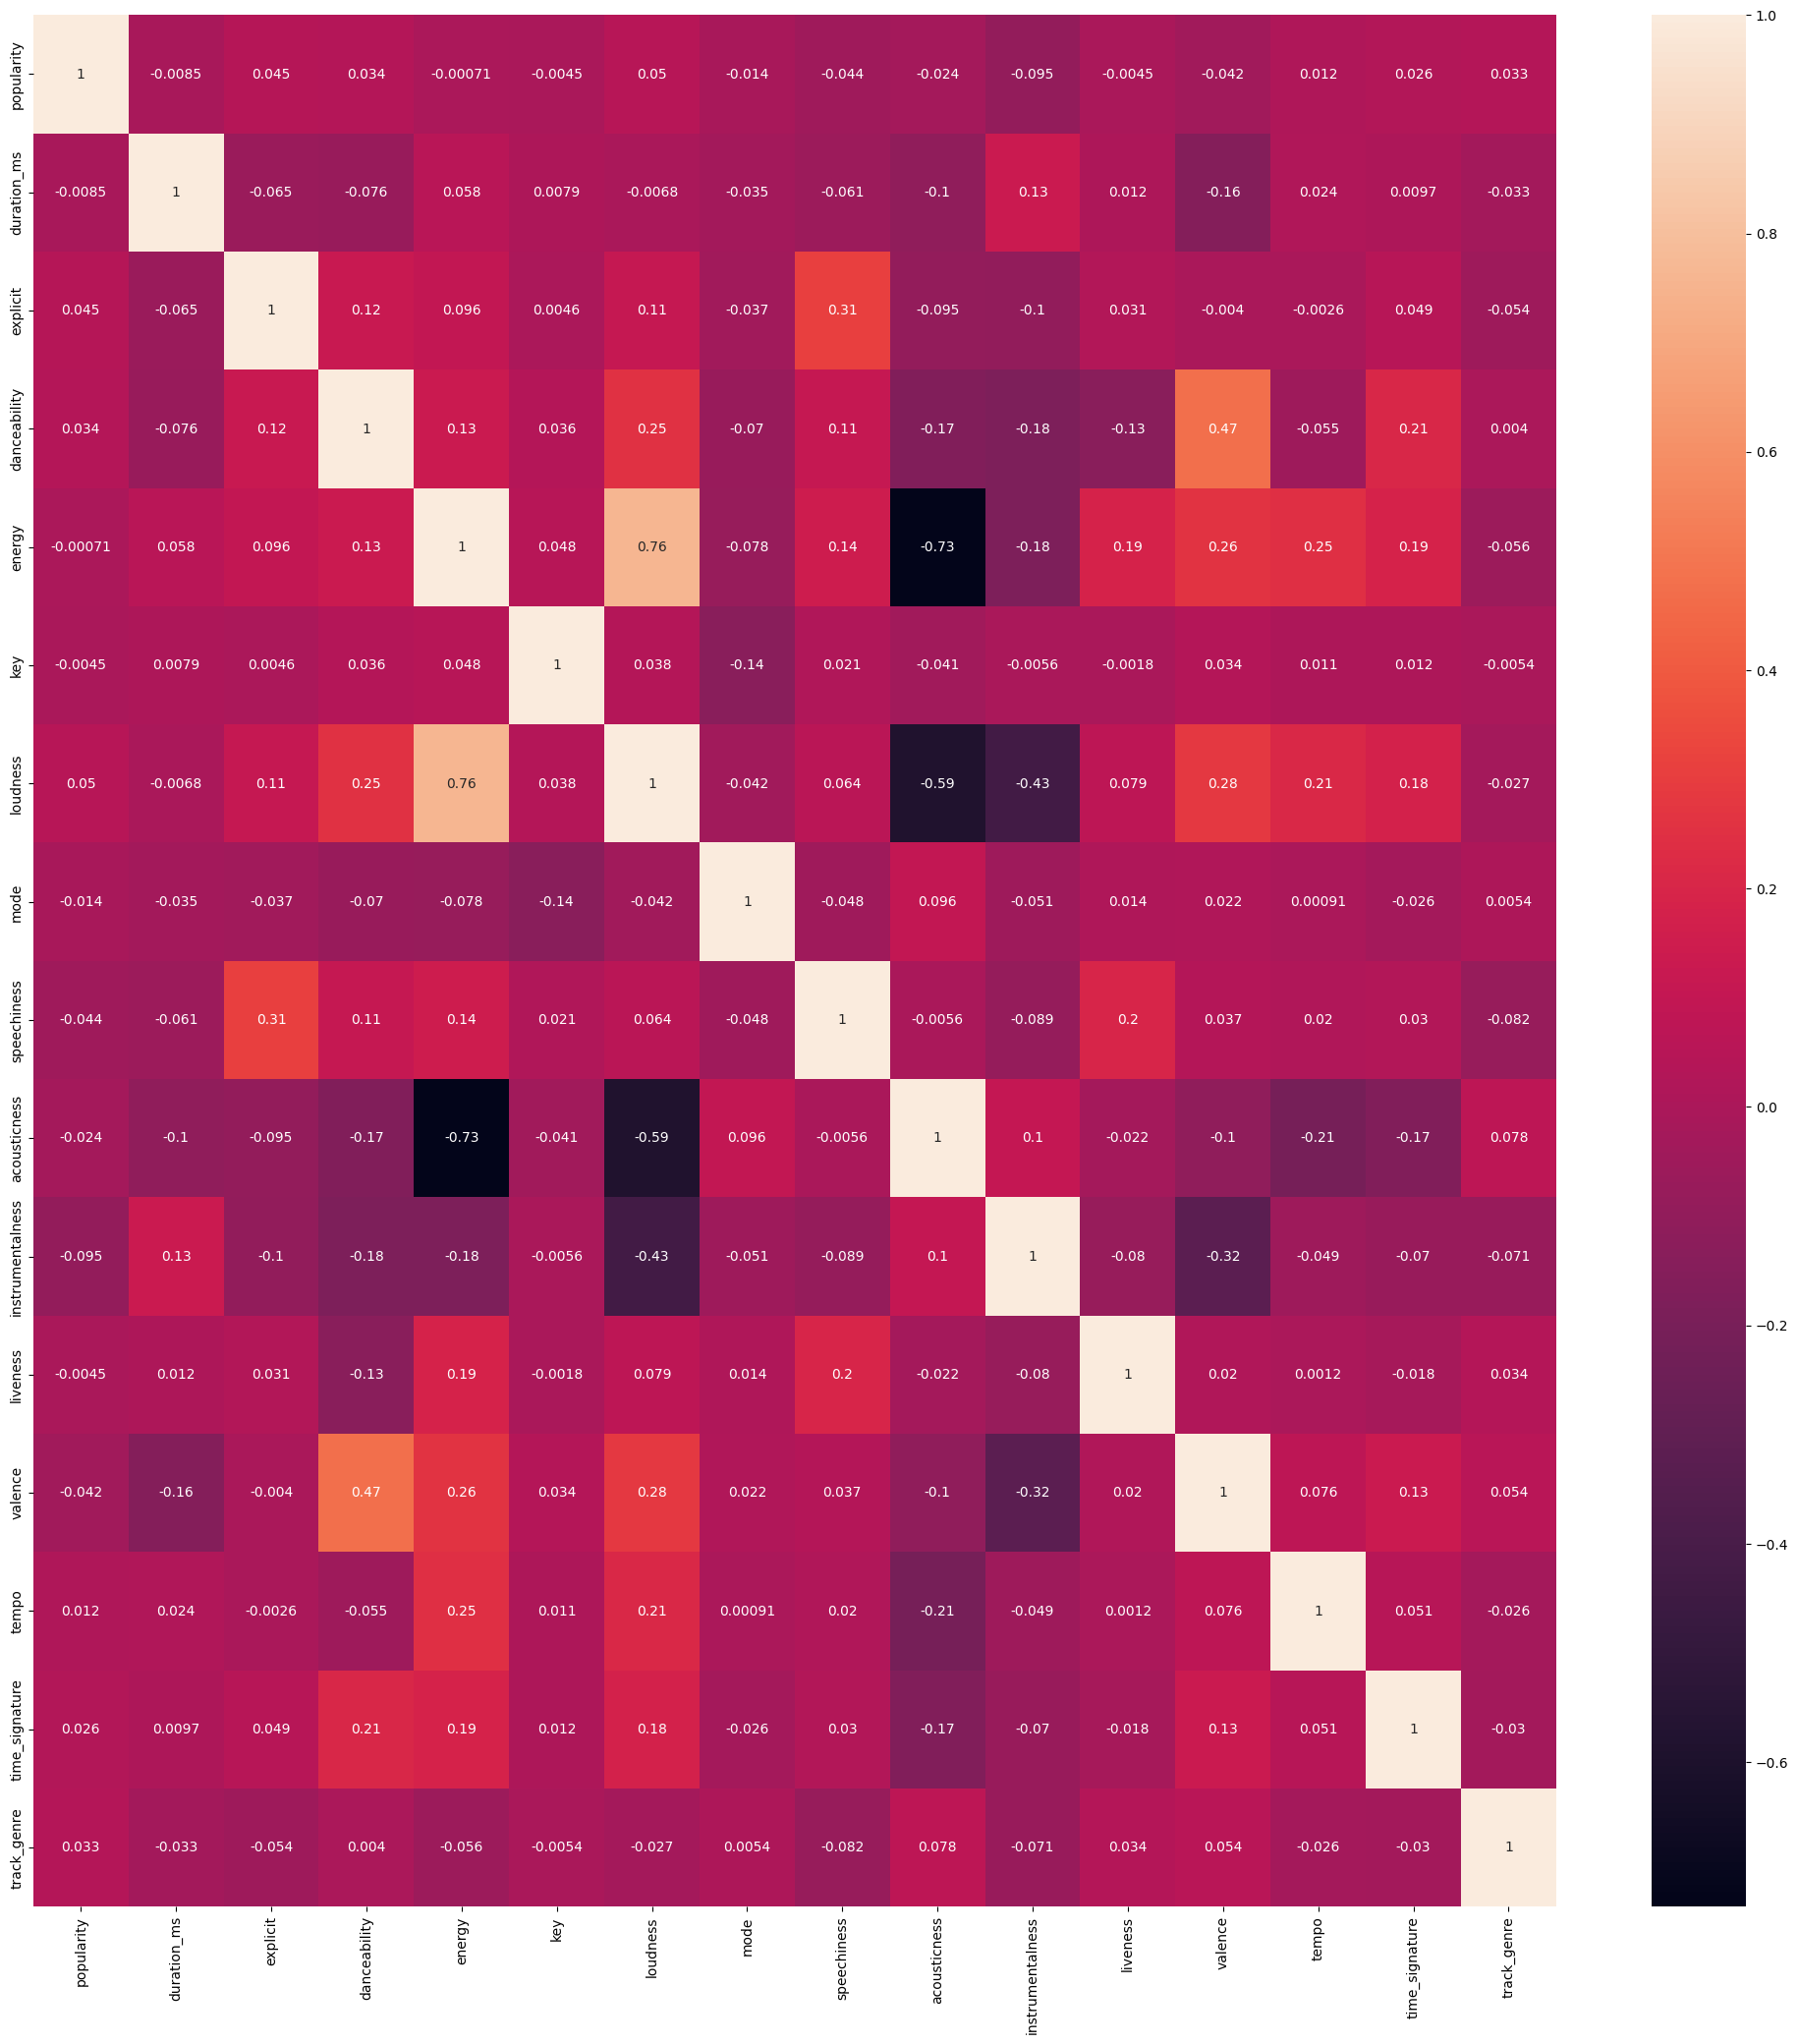

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(correlation, annot = True)

# Grouping data

Here we will use groupby the data on the basis of various use-cases.

### Grouping artists, albums and tracks on basis of maximu value of loudness.

In [11]:
spotify.groupby(["artists","album_name","track_name"])[["loudness"]].mean().reset_index().sort_values(by = "loudness", ascending = False)

,artists,album_name,track_name,loudness
26532,Five Star Hotel,Gray Data,Fate Dance,4.532
54434,Najand,In the Night of Revolution,Islamic Capitalism,3.156
77762,The Red Pears,We Bring Anything to the Table... Except Table...,Time Bomb,2.574
54428,Najand,In the Night of Revolution,A Better World Is Possible,1.864
17576,DJ BRUNO PRADO,TIPO HARIEL - SEI QUE E RARIDADE -,TIPO HARIEL - SEI QUE E RARIDADE -,1.821
...,...,...,...,...
44356,Lazar Berman,Inedito (Unpublished),Chaconne in sol maggiore : Variazione 9,-43.957
83485,White Noise for Babies;Crickets;Baby Sleep Sounds,Cricket Sounds,Cricket Sound 4 - Loopable With No Fade,-46.251
6628,Atmosphere Asmr,Fan Sounds & White Noise 2 (Deluxe Edition),Ceiling Fan Sound on Low Power,-46.591
83436,White Noise Sleep Sounds,Soothing White Noise,White Noise - Loopable With No Fade,-49.307


### Grouping artists, albums and tracks on basis of maximu value of popularity.

In [12]:
spotify.groupby(["artists","album_name","track_name"])[["popularity"]].max().reset_index()

,artists,album_name,track_name,popularity
0,!nvite,pagadoff,pagadoff,5
1,!nvite,strolling,strolling,41
2,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Going on a Mission,55
3,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60
4,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",Gotta Boogie,25
...,...,...,...,...
88536,黃妃,非常妃,恨世生,25
88537,黃小琥,簡單不簡單,沒那麽簡單,56
88538,黃敏華,關不掉的聲音,堤岸,20
88539,龍藏Ryuzo,ANISON Explosion~Acoustic Solo Guitar~,ゲゲゲの鬼太郎 (Instrumental),23


### Grouping artists, albums and tracks on basis of maximu value of danceability and popularity.

In [13]:
spotify.groupby(["artists","album_name","track_name"])[["danceability","popularity"]].mean().reset_index().sort_values(by = ["danceability", "popularity"],ascending=False )

,artists,album_name,track_name,danceability,popularity
62923,Quantic,The Best of Quantic,Sol Clap,0.985,19.0
75067,That Girl Lay Lay,Tha Cheat Code Reloaded,Medicaid Baby,0.984,10.0
19875,Delano Smith,An Odyssey,Inspiration,0.983,5.0
57591,Oliver Schories,Fields Without Fences,Daily Routines,0.982,49.0
86696,dj funk,Dance Mania: Ghetto Madness,Bitches,0.981,10.0
...,...,...,...,...,...
18561,Daniel Radcliffe;Rose Hemingway;Christopher J....,How To Succeed In Business Without Really Trying,Act One Finale,0.000,21.0
44604,Leila Bela,Angra Manyu,Leaving Her Quantum Journey Behind...,0.000,0.0
44612,Leila Bela,Angra Manyu,The Exorsism Begins...,0.000,0.0
44614,Leila Bela,Angra Manyu,V-4,0.000,0.0


### Grouping artists, albums and tracks on basis of maximu value of acouticness and energy.

In [14]:
spotify.groupby(["artists","album_name","track_name","track_genre"])[["acousticness","energy"]].max().reset_index().sort_values(by = ["acousticness","energy"],ascending=False )

,artists,album_name,track_name,track_genre,acousticness,energy
105716,White Noise for Babies,Sea of White Noise,Noise Ambience Calmness,sleep,0.996,0.971000
103056,Underwater Deep Sleep White Noise Nature Ocean...,""" ! + restful + ! """,Underwater Bubbles,sleep,0.996,0.963000
38806,Granular,Brown Noise For Sleep,Brown Noise For Sleep 3,sleep,0.996,0.836000
108056,Yuri Morfessi,Лучшие песни первой мировой войны,Рвемся в бой,romance,0.996,0.415000
12568,Binaural Beats;White Noise Babies;Binaural Bea...,Airconditioner Noise,Nap in the Afternoon Box Fan,sleep,0.996,0.414000
...,...,...,...,...,...,...
58244,Loopable,Loopable Ambience of Brown Noise and Brown Waves,Pure Brown Noise - Loopable with no fade,sleep,0.000,0.000020
64767,Meditation Spa;Deep Sleep;White Noise Therapy;...,Appliances and other Household Ambiences (Loop...,Pure Brown Noise - Loopable Background,sleep,0.000,0.000020
105685,White Noise Relaxation;Outside Broadcast Recor...,"Pink, White, Blue and Brown Noises",Pure Brown Noise,sleep,0.000,0.000020
105695,White Noise Sleep Sounds;Static White Noise So...,White Noise Sleep Sounds,"White Noise - Loopable, No Fade",sleep,0.000,0.000019


# Data Visualizations

He will use seaborn and matplotlib libraries of python for visualizing the data

### Box Plot track_genre vs danceability



<Axes: title={'center': 'danceability'}, xlabel='track_genre'>

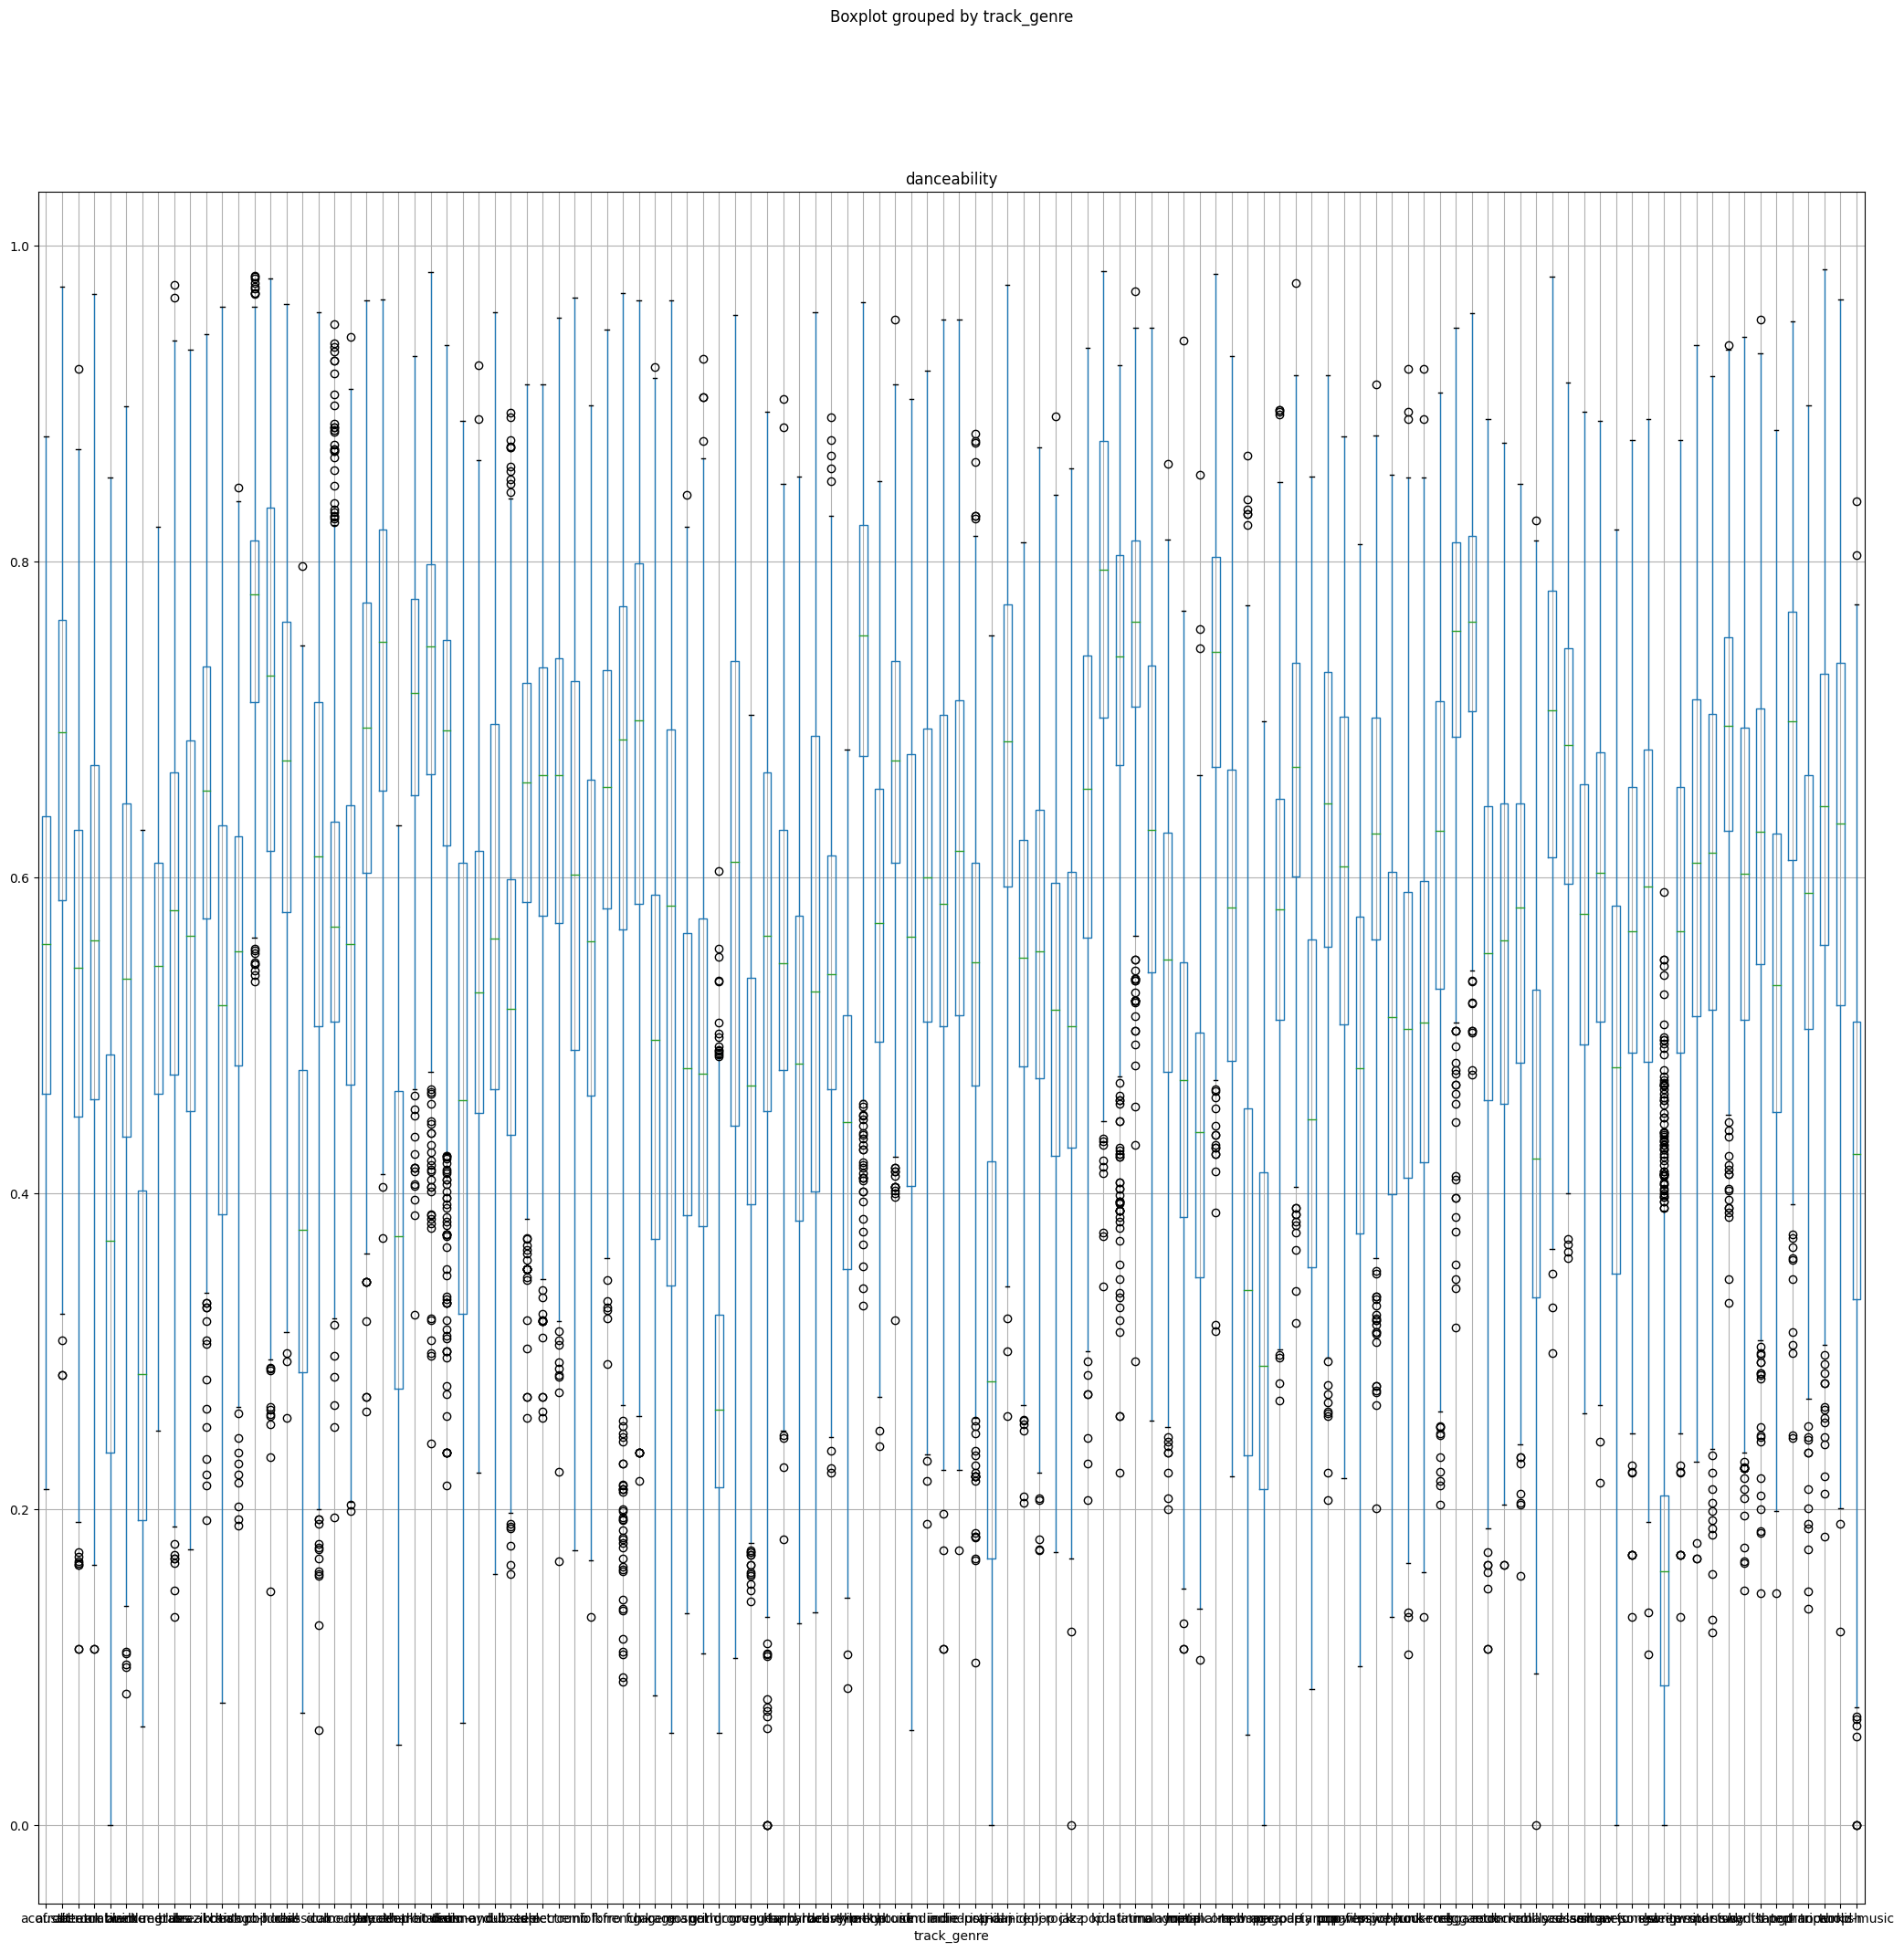

In [15]:
spotify.boxplot(by ='track_genre', column ='danceability', figsize=(25,25))

### Plotting bar graph for track_genre and popularity

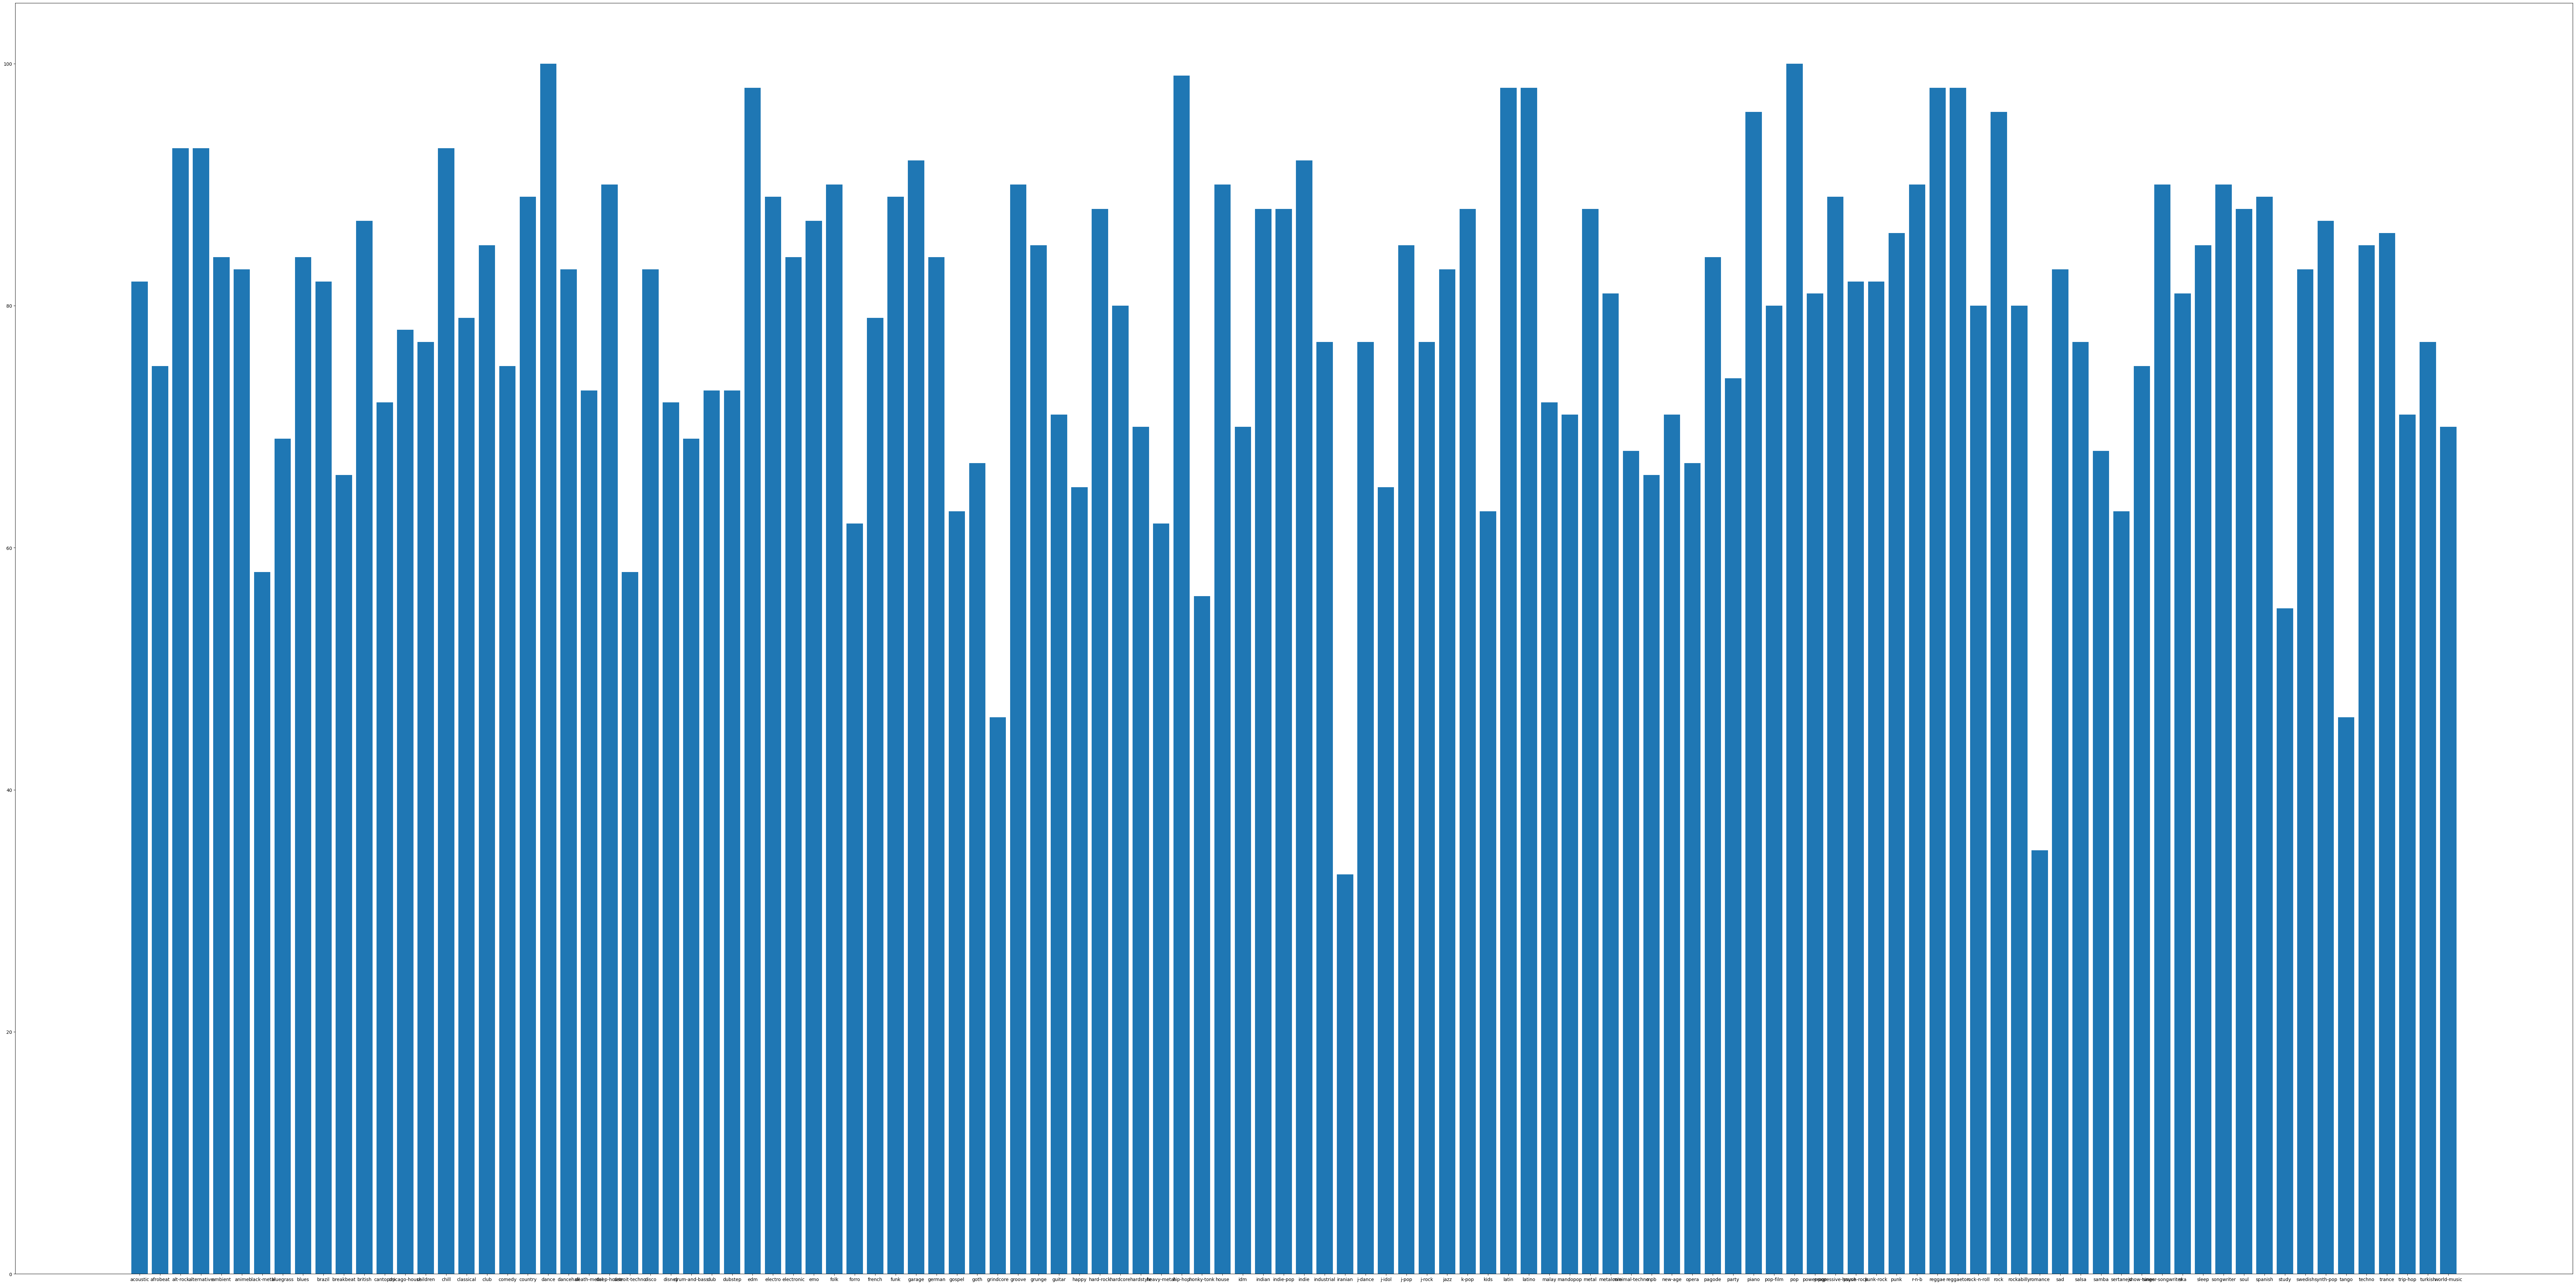

In [16]:
plt.figure(figsize =(100, 50))
plt.bar(spotify["track_genre"], spotify["popularity"])
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 
plt.show()

### Distribution plot for duration_ms column

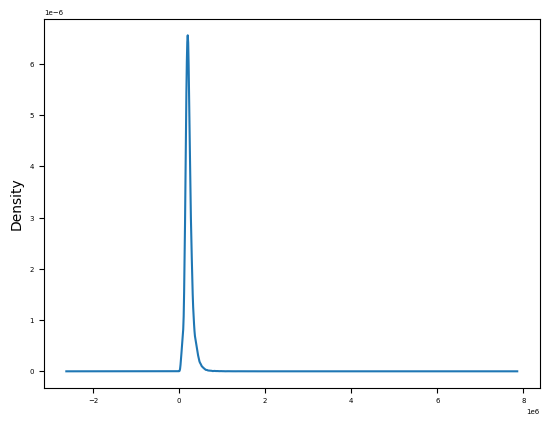

In [17]:
spotify['duration_ms'].plot(kind='kde')
plt.show()

### Distribution plot for danceability, energy and acousticness

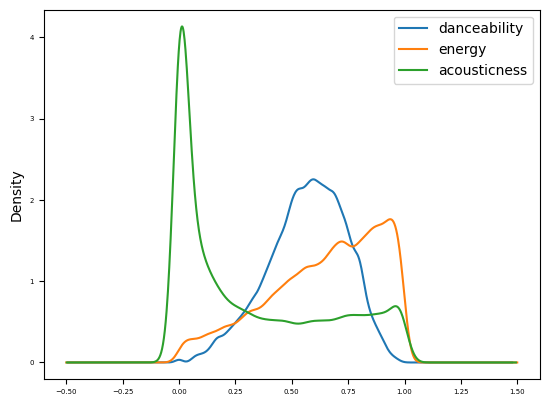

In [18]:
spotify['danceability'].plot(kind='kde')
spotify['energy'].plot(kind='kde')
spotify['acousticness'].plot(kind='kde')
plt.legend(loc='best')
plt.show()

### Plotting the grouped data of track_genre wrt to populaity mean

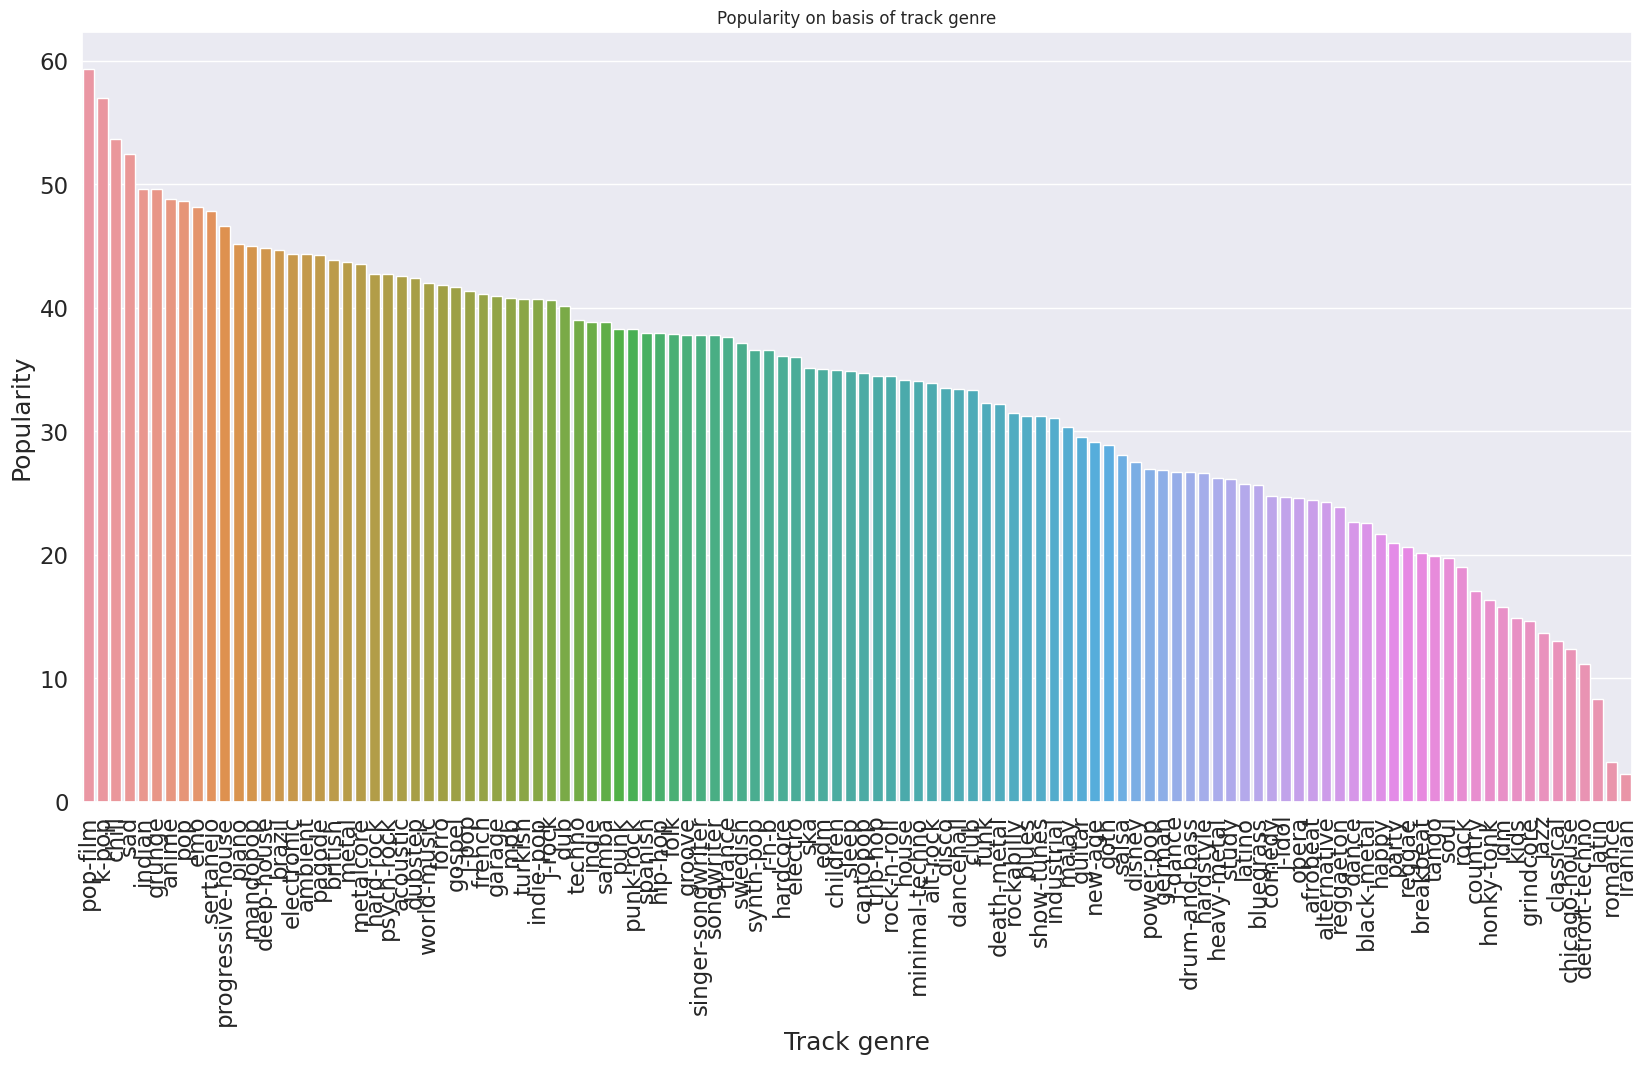

In [32]:
plt.figure(figsize = (20,10), dpi = 100)
sns.barplot(x = spotify.groupby('track_genre')["popularity"].mean().sort_values(ascending = False).index , 
            y = spotify.groupby('track_genre')["popularity"].mean().sort_values(ascending = False).values)
sns.set(font_scale=1.0)
plt.xlabel('Track genre')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('Popularity on basis of track genre')
plt.show()

### Plotting the grouped data of track_genre wrt to danceability median

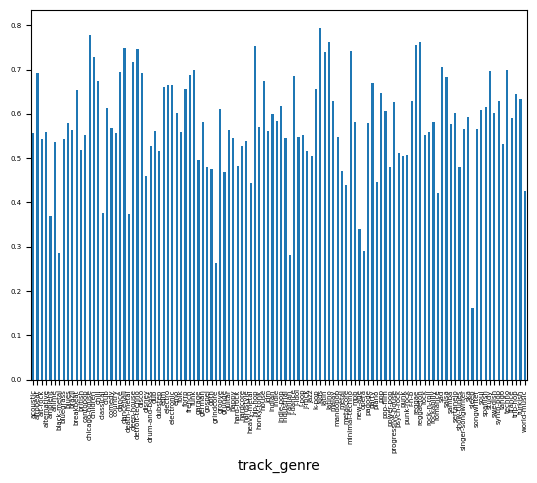

<Figure size 5000x2500 with 0 Axes>

In [21]:
spotify.groupby('track_genre')["danceability"].median().plot(kind='bar')
plt.figure(figsize =(50, 25))
plt.show()

<Axes: xlabel='mode', ylabel='count'>

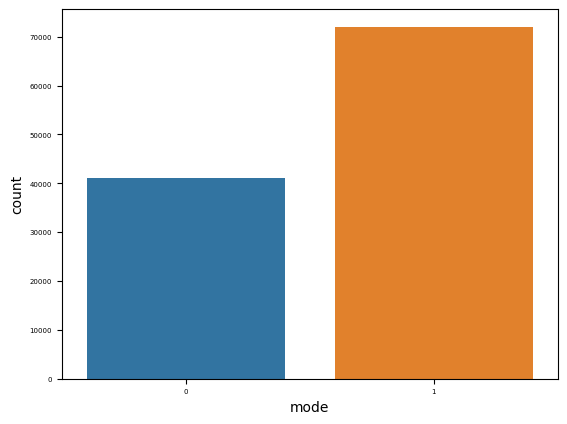

In [22]:
sns.countplot(x = 'mode',data=spotify)

<Axes: xlabel='time_signature', ylabel='count'>

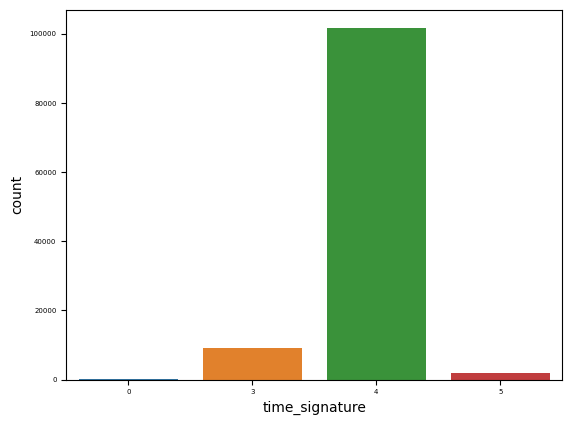

In [23]:
sns.countplot(x = 'time_signature',data=spotify)

/tmp/ipykernel_18765/940480278.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spotify["danceability"])


<Axes: xlabel='danceability', ylabel='Density'>

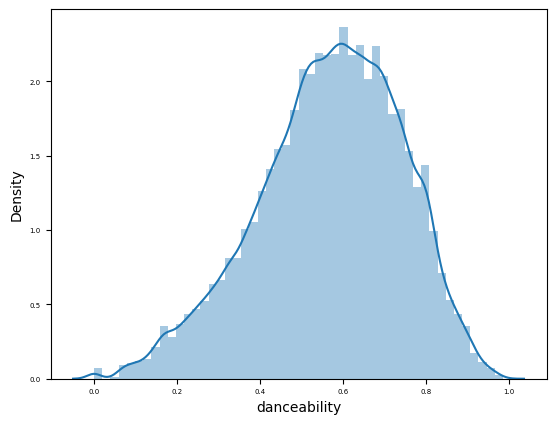

In [24]:
sns.distplot(spotify["danceability"])

# Machine Learning model 

## Standard Scaling the numerical data: